In [2]:
#Nonlinear Regression and Gradient Descent

#Previoulsy we have seen linear regression techniques, however many problems are not linear so a more general framework is neccesary.
# There is no general way to solve a set a non-linear systems,
# instead we use iterative techniques that converge to the global minimum error, hence the best solution.
# One such technique is Gradient Descent. Recalling that the minimum most occur when the gradient of the function is zero,
# the gradient descent method creates a sequence in which each next 
# point moves in the direction of -grad(f(X)), i.e. x_(k+1)=x_k-delta*grad(f(x_k)), where delta is the step value.
# Such tecniques also require a sufficiently good inital guess for fast convergence.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.interpolate
from matplotlib import rcParams
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
rcParams.update({'font.size': 18})

In [2]:
#Create several surfaces to show the importance of choosing a good inital guess
h = 0.5
x = np.arange(-6,6+h,h)
y = np.arange(-6,6+h,h)

X,Y = np.meshgrid(x,y)
F0 = 1.5 - 1.0*np.exp(-0.03*(3*np.power(X,2)+np.power(Y,2)))
F = 1.5 - 1.6*np.exp(-0.05*(3*np.power(X,2)+np.power(Y+3,2)))
F2 = F + (0.5 - 1.0*np.exp(-0.1*(3*np.power(X-3,2)+np.power(Y-3,2))))
#Calculate the x and y gradients of the surfaces
dF0y,dF0x = np.gradient(F0,h,h) 
dF2y,dF2x = np.gradient(F2,h,h) 

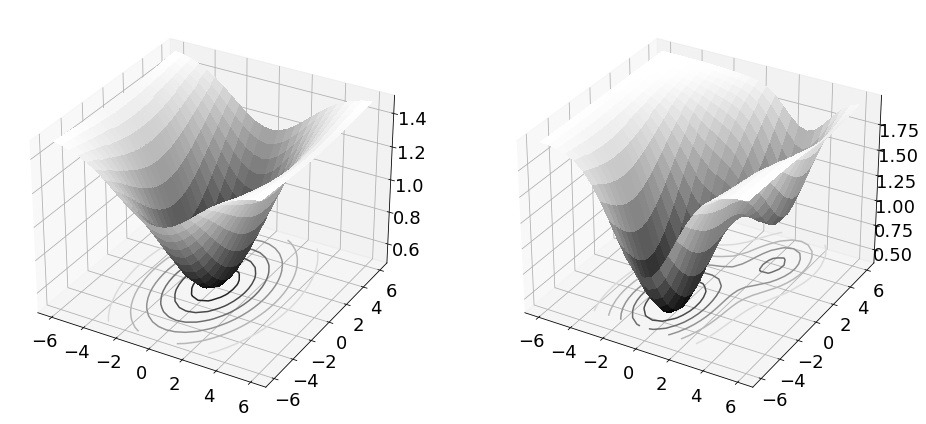

In [3]:
#Plot above surfaces
rcParams['figure.figsize'] = [16, 8]
fig,axs = plt.subplots(1,2,subplot_kw={'projection': '3d'})
axs[0].plot_surface(X, Y, F0, cmap='gray',linewidth=0, antialiased=False)
axs[0].contour(X, Y, F0, zdir='z', offset=axs[0].get_zlim()[0], cmap='gray')
axs[1].plot_surface(X, Y, F2, cmap='gray',linewidth=0, antialiased=False)
axs[1].contour(X, Y, F2, zdir='z', offset=axs[0].get_zlim()[0], cmap='gray')

plt.show()

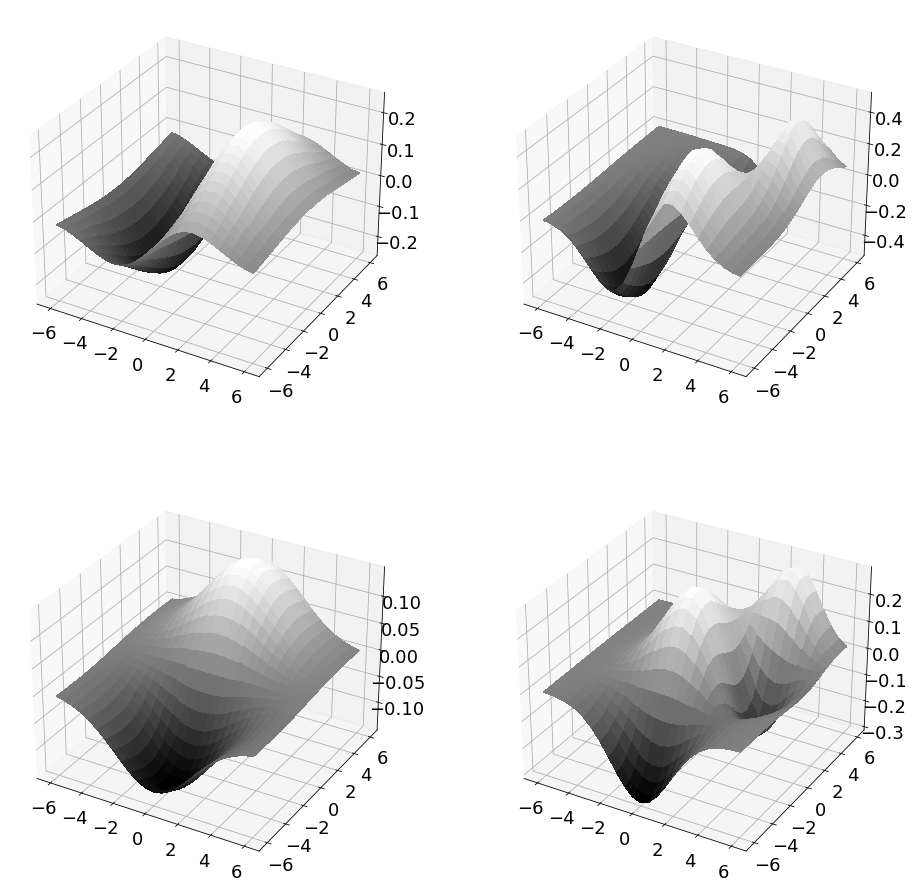

In [12]:
#Plot the x and y gradient of the above surfaces. Note where the gradient is 0, and how the gradient moves us to where the gradient is 0.
rcParams['figure.figsize'] = [16, 16]
fig,axs = plt.subplots(2,2,subplot_kw={'projection': '3d'})
axs = axs.reshape(-1)
axs[0].plot_surface(X, Y, dF0x, cmap='gray',linewidth=0, antialiased=False)
axs[2].plot_surface(X, Y, dF0y, cmap='gray',linewidth=0, antialiased=False)
axs[1].plot_surface(X, Y, dF2x, cmap='gray',linewidth=0, antialiased=False)
axs[3].plot_surface(X, Y, dF2y, cmap='gray',linewidth=0, antialiased=False)

plt.show()

In [26]:
## Gradient Descent

#initalize arrays to hold iterations
x = np.zeros(10)
y = np.zeros(10)
f = np.zeros(10)

# Surface we will be optimizing over: x^2+3y^2
# Note that this is a convex surface with only 1 minimum
Fquad = np.power(X,2) + 3*np.power(Y,2)

#initial guess
x[0] = 3 
y[0] = 2 
#initial function value
f[0] = x[0]**2 + 3*y[0]**2 

#run gradient descent
for j in range(len(x)-1):
    #Calculate optimal step size, delta. Delta is chosen such that the gradients of subsequent points are orthogonal.
    # This is done so we move the furtherest possible distance with maximum steepest gradient before switching directions.
    #See formulas (4.34)-(4.37) in book
    Del = (x[j]**2 + 9*y[j]**2)/(2*x[j]**2 + 54*y[j]**2)
    #update values based on dfx and dfy respectively
    x[j+1] = (1 - 2*Del)*x[j] 
    y[j+1] = (1 - 6*Del)*y[j]
    f[j+1] = x[j+1]**2 + 3*y[j+1]**2
    #check convergence, if step is less 10^-6
    if np.abs(f[j+1]-f[j]) < 10**(-6): 
        x = x[:j+2]
        y = y[:j+2]
        f = f[:j+2]
        break

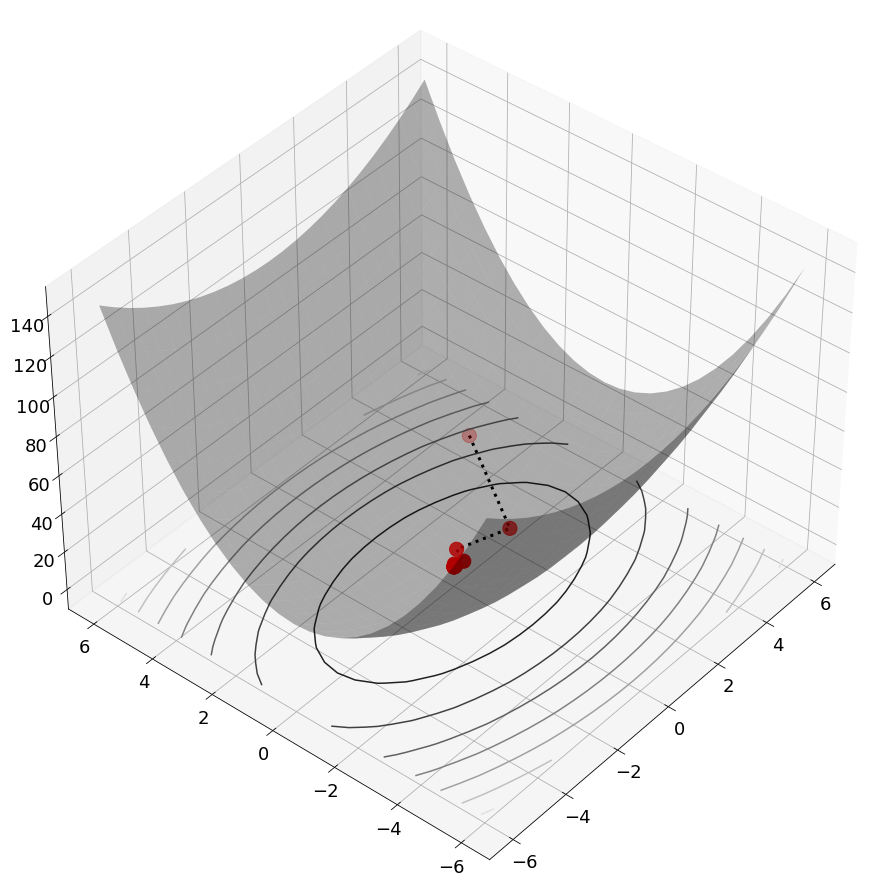

In [15]:
#plot gradient descent
fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, Fquad,linewidth=0,color='k',alpha=0.3)
ax.scatter(x,y,f,'o',color='r',s=200)
ax.plot(x,y,f,':',color='k',linewidth=3)
ax.contour(X, Y, Fquad, zdir='z', offset=ax.get_zlim()[0], cmap='gray')
ax.view_init(elev=40, azim=-140)
plt.show()
#Note that steps are orthogonal becasuse of how we choose delta

In [65]:
## Computing the gradient descent with fmin
# This is a more general approach when we might not know how to calculate the optimal delta length directly
# We will also use a function with more than one minimum and several different initial values to see what happens

#Reset some variables
h = 0.1
x = np.arange(-6,6+h,h)
y = np.arange(-6,6+h,h)
X,Y = np.meshgrid(x,y)
#Similar function to original exmaple with multple minimums
F1 = 1.5 - 1.6*np.exp(-0.05*(3*np.power(X+3,2)+np.power(Y+3,2)))
F = F1 + 0.5 - np.exp(-0.1*(3*np.power(X-3,2)+np.power(Y-3,2)))

dFy,dFx = np.gradient(F,h,h)

#calculate bivariate spline approximations of the function f and its x and y gradients
F_interp = scipy.interpolate.RectBivariateSpline(x,y,F)
dFx_interp = scipy.interpolate.RectBivariateSpline(x,y,dFx)
dFy_interp = scipy.interpolate.RectBivariateSpline(x,y,dFy)
print(scipy.interpolate.RectBivariateSpline.get_coeffs(F_interp))

#Set three intial guesses
x0 = np.array([4,0,-5])
y0 = np.array([0,-5,2])

#Function to calculate optimal delta value
def delsearch(Del,t):
    x,y,dfx,dfy,X,Y,F = t
    x0 = x-Del*dfx
    y0 = y-Del*dfy
    return F_interp(x0,y0)

#Run gradient descent 3 times with diffrent inital guesses
maxIt=100;
for jj in range(3):
    #Initalize arryas
    x = np.zeros(maxIt)
    y = np.zeros(maxIt)
    f = np.zeros(maxIt)
    #Set inital values
    x[0] = x0[jj]
    y[0] = y0[jj]
    f[0] = F_interp(x[0],y[0])
    dfx = dFx_interp(x[0],y[0])
    dfy = dFy_interp(x[0],y[0])
    for j in range(len(x)-1):
        t = x[j],y[j],dfx,dfy,X,Y,F
        #Find optimal delta value.
        Del = scipy.optimize.fmin(delsearch,0.02,args=(t,),disp=False);
        #Update x, y, and f
        x[j+1] = x[j]-Del*dfx
        y[j+1] = y[j]-Del*dfy
        f[j+1] = F_interp(x[j+1],y[j+1])
        #update derivatives for new point
        dfx = dFx_interp(x[j+1],y[j+1])
        dfy = dFy_interp(x[j+1],y[j+1])
        #check convergence, if step is less 10^-6
        if np.abs(f[j+1]-f[j]) < 10**(-6):
            x = x[:j+2]
            y = y[:j+2]
            f = f[:j+2]
            break
    if jj == 0:
        x1 = x
        y1 = y
        f1 = f
    if jj == 1:
        x2 = x
        y2 = y
        f2 = f
    if jj == 2:
        x3 = x
        y3 = y
        f3 = f

[1.73552178 1.71965488 1.69449518 ... 1.96375687 1.96939751 1.97267613]


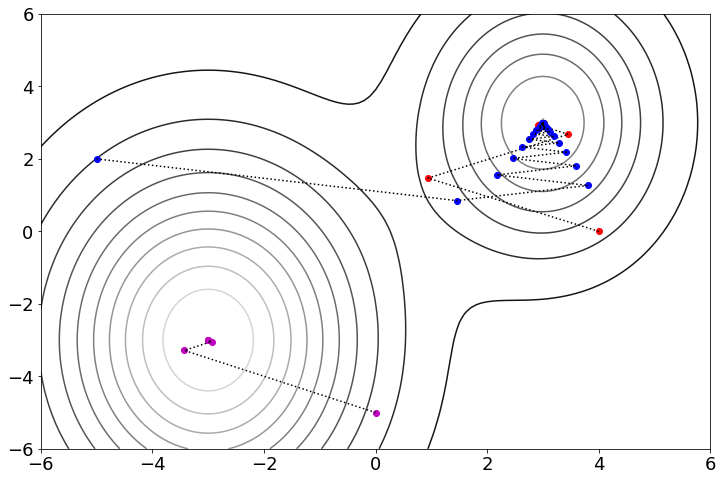

8
6
36


In [66]:
#Plot contour of function f and the three gradient descent paths
# note how the intial guess determines which minimum the algorithm converges to
rcParams['figure.figsize'] = [12, 8]
plt.figure()
plt.contour(X,Y,F-1,10,cmap='binary')
plt.plot(x1,y1,'o',color='r')
plt.plot(x1,y1,':',color='k')
plt.plot(x2,y2,'o',color='m')
plt.plot(x2,y2,':',color='k')
plt.plot(x3,y3,'o',color='b')
plt.plot(x3,y3,':',color='k')
plt.show()
print(x1.size)
print(x2.size)
print(x3.size)

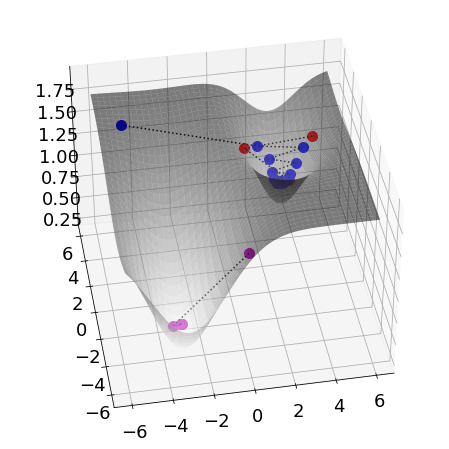

In [67]:
#Same plots as above on a 3d surface
fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, F-0.2,cmap='binary',alpha=0.5)
ax.plot(x1,y1,f1,'o',color='r',markersize=10)
ax.plot(x1,y1,f1,':',color='k')
ax.plot(x2,y2,f2,'o',color='m',markersize=10)
ax.plot(x2,y2,f2,':',color='k')
ax.plot(x3,y3,f3,'o',color='b',markersize=10)
ax.plot(x3,y3,f3,':',color='k')
ax.view_init(elev=40, azim=-100)
plt.show()

In [68]:
## Alternating Descent
# Another approach to gradient descent in which we optimize alternating over each variable one at a time while holding all other variables fixed
# This is sometimes useful as we do not need to know/calculate the derivative of the function and optimimizing in one variable at a time can quicken the computational time
h = 0.1
x = np.arange(-6,6+h,h)
y = np.arange(-6,6+h,h)
X,Y = np.meshgrid(x,y)

F1 = 1.5 - 1.6*np.exp(-0.05*(3*np.power(X+3,2)+np.power(Y+3,2)))
F = F1 + 0.5 - np.exp(-0.1*(3*np.power(X-3,2)+np.power(Y-3,2)))

#For alterating descent we only to to aproximate f, and not the derivatives
F_interp = scipy.interpolate.RectBivariateSpline(x,y,F)

#same 3 inital guesses as before
x0 = np.array([4,0,-5])
y0 = np.array([0,-5,2])

for jj in range(3):
    xa = np.zeros(5)
    ya = np.zeros(5)
    f = np.zeros(5)
    xa[0] = x0[jj]
    ya[0] = y0[jj]
    f[0] = F_interp(xa[0],ya[0])
    #Optimize over y, holding x constant
    fx = F_interp(xa[0],y)
    xa[1]=xa[0]
    ya[1]=y[np.argmin(fx)]
    #Optimize over x, holding y constant
    fy = F_interp(x,ya[1])
    ya[2]=ya[1]
    xa[2]=x[np.argmin(fy)]
    #Optimize over y, holding x constant
    fx = F_interp(xa[2],y)
    xa[3]=xa[2]
    ya[3]=y[np.argmin(fx)]
    #Optimize over x, holding y constant   
    fy = F_interp(x,ya[3])
    ya[4]=ya[3]
    xa[4]=x[np.argmin(fy)]
    #calculate function values
    for j in range(1,5):
        f[j] = F_interp(xa[j],ya[j])
    
    if jj == 0:
        x1 = xa
        y1 = ya
        f1 = f
    if jj == 1:
        x2 = xa
        y2 = ya
        f2 = f
    if jj == 2:
        x3 = xa
        y3 = ya
        f3 = f

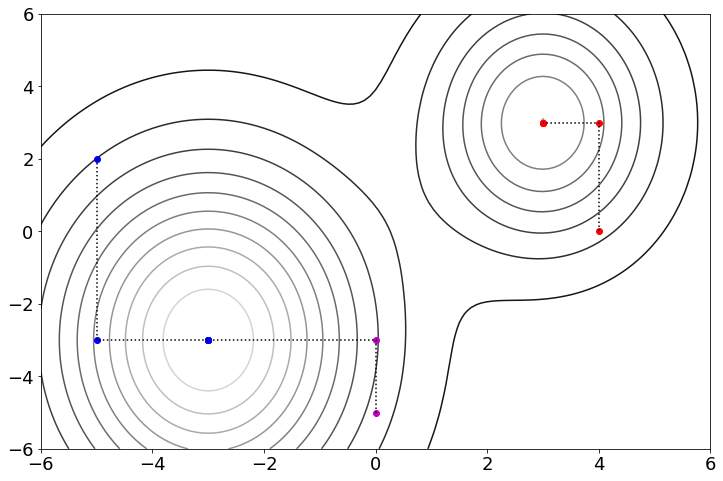

In [69]:
#Plot on contour.
# note that the third inital guess (blue) converges to a differnt minimum than before
rcParams['figure.figsize'] = [12, 8]
plt.figure()
plt.contour(X,Y,F-1,10,cmap='binary')
plt.plot(x1,y1,'o',color='r')
plt.plot(x1,y1,':',color='k')
plt.plot(x2,y2,'o',color='m')
plt.plot(x2,y2,':',color='k')
plt.plot(x3,y3,'o',color='b')
plt.plot(x3,y3,':',color='k')
plt.show()

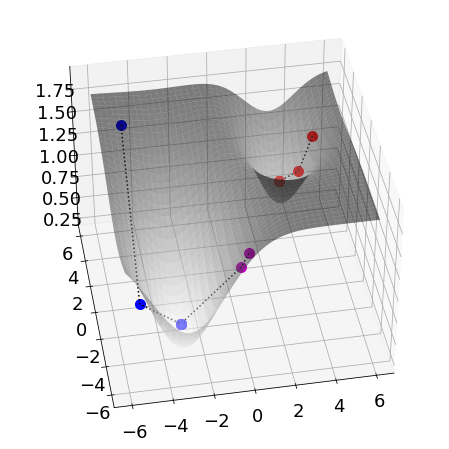

In [70]:
#Plot on surface
fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, F-0.2,cmap='binary',alpha=0.5)
ax.plot(x1,y1,f1,'o',color='r',markersize=10)
ax.plot(x1,y1,f1,':',color='k')
ax.plot(x2,y2,f2,'o',color='m',markersize=10)
ax.plot(x2,y2,f2,':',color='k')
ax.plot(x3,y3,f3,'o',color='b',markersize=10)
ax.plot(x3,y3,f3,':',color='k')
ax.view_init(elev=40, azim=-100)
plt.show()